In [174]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb

In [175]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [176]:
%cd /sphenix/user/egm2153/calib_study/JetValidation/analysis

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/JetValidation/analysis


In [177]:
direct = 'results_11_11'
topo_thres = ['-9999','0','100','200','300','500']
thres_string = ['All E_{topo}','E_{topo} > 0 MeV','E_{topo} > 100 MeV','E_{topo} > 200 MeV','E_{topo} > 300 MeV','E_{topo} > 500 MeV']

In [183]:
#f2 = ROOT.TFile.Open("pt10cut/dijet_calo_analysis_fullrunlist.root")
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_data_topo_pt7cut_wAj_wntopo.root")
h_ntopo_towards = []
h_ntopo_transverse = []
h_ntopo_away = []
h_topo_towards = []
h_topo_transverse = []
h_topo_away = []
h_2D_topo_towards = []
h_2D_topo_transverse = []
h_2D_topo_away = []
for i, t in enumerate(topo_thres):
    h_ntopo_towards.append(f2.Get('h_ntopo'+t+'_towards'))
    h_ntopo_transverse.append(f2.Get('h_ntopo'+t+'_transverse'))
    h_ntopo_away.append(f2.Get('h_ntopo'+t+'_away'))
    h_ntopo_towards[i].Scale(1.0/h_ntopo_towards[i].Integral())
    h_ntopo_transverse[i].Scale(1.0/h_ntopo_transverse[i].Integral())
    h_ntopo_away[i].Scale(1.0/h_ntopo_away[i].Integral())
    h_ntopo_towards[i].SetDirectory(0)
    h_ntopo_transverse[i].SetDirectory(0)
    h_ntopo_away[i].SetDirectory(0)
    h_topo_towards.append(f2.Get('h_topo'+t+'_towards'))
    h_topo_transverse.append(f2.Get('h_topo'+t+'_transverse'))
    h_topo_away.append(f2.Get('h_topo'+t+'_away'))
    h_topo_towards[i].Rebin(10)
    h_topo_transverse[i].Rebin(2)
    h_topo_away[i].Rebin(10)
    h_topo_towards[i].Scale(1.0/h_topo_towards[i].Integral())
    h_topo_transverse[i].Scale(1.0/h_topo_transverse[i].Integral())
    h_topo_away[i].Scale(1.0/h_topo_away[i].Integral())
    h_topo_towards[i].SetDirectory(0)
    h_topo_transverse[i].SetDirectory(0)
    h_topo_away[i].SetDirectory(0)
    h_2D_topo_towards.append(f2.Get('h_2D_topo'+t+'_towards'))
    h_2D_topo_transverse.append(f2.Get('h_2D_topo'+t+'_transverse'))
    h_2D_topo_away.append(f2.Get('h_2D_topo'+t+'_away'))
    h_2D_topo_towards[i].SetDirectory(0)
    h_2D_topo_transverse[i].SetDirectory(0)
    h_2D_topo_away[i].SetDirectory(0)
f2.Close()

In [179]:
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_waveform_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_mc_ntopo_towards = []
h_mc_ntopo_transverse = []
h_mc_ntopo_away = []
h_mc_topo_towards = []
h_mc_topo_transverse = []
h_mc_topo_away = []
h_mc_2D_topo_towards = []
h_mc_2D_topo_transverse = []
h_mc_2D_topo_away = []
for i, t in enumerate(topo_thres):
    h_mc_ntopo_towards.append(f2.Get('h_ntopo'+t+'_towards'))
    h_mc_ntopo_transverse.append(f2.Get('h_ntopo'+t+'_transverse'))
    h_mc_ntopo_away.append(f2.Get('h_ntopo'+t+'_away'))
    h_mc_ntopo_towards[i].Scale(1.0/h_mc_ntopo_towards[i].Integral())
    h_mc_ntopo_transverse[i].Scale(1.0/h_mc_ntopo_transverse[i].Integral())
    h_mc_ntopo_away[i].Scale(1.0/h_mc_ntopo_away[i].Integral())
    h_mc_ntopo_towards[i].SetDirectory(0)
    h_mc_ntopo_transverse[i].SetDirectory(0)
    h_mc_ntopo_away[i].SetDirectory(0)
    h_mc_topo_towards.append(f2.Get('h_topo'+t+'_towards'))
    h_mc_topo_transverse.append(f2.Get('h_topo'+t+'_transverse'))
    h_mc_topo_away.append(f2.Get('h_topo'+t+'_away'))
    h_mc_topo_towards[i].Rebin(10)
    h_mc_topo_transverse[i].Rebin(2)
    h_mc_topo_away[i].Rebin(10)
    h_mc_topo_towards[i].Scale(1.0/h_mc_topo_towards[i].Integral())
    h_mc_topo_transverse[i].Scale(1.0/h_mc_topo_transverse[i].Integral())
    h_mc_topo_away[i].Scale(1.0/h_mc_topo_away[i].Integral())
    h_mc_topo_towards[i].SetDirectory(0)
    h_mc_topo_transverse[i].SetDirectory(0)
    h_mc_topo_away[i].SetDirectory(0)
    h_mc_2D_topo_towards.append(f2.Get('h_2D_topo'+t+'_towards'))
    h_mc_2D_topo_transverse.append(f2.Get('h_2D_topo'+t+'_transverse'))
    h_mc_2D_topo_away.append(f2.Get('h_2D_topo'+t+'_away'))
    h_mc_2D_topo_towards[i].SetDirectory(0)
    h_mc_2D_topo_transverse[i].SetDirectory(0)
    h_mc_2D_topo_away[i].SetDirectory(0)
f2.Close()  
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_cluster_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_clus_ntopo_towards = []
h_clus_ntopo_transverse = []
h_clus_ntopo_away = []
h_clus_topo_towards = []
h_clus_topo_transverse = []
h_clus_topo_away = []
h_clus_2D_topo_towards = []
h_clus_2D_topo_transverse = []
h_clus_2D_topo_away = []
for i, t in enumerate(topo_thres):
    h_clus_ntopo_towards.append(f2.Get('h_ntopo'+t+'_towards'))
    h_clus_ntopo_transverse.append(f2.Get('h_ntopo'+t+'_transverse'))
    h_clus_ntopo_away.append(f2.Get('h_ntopo'+t+'_away'))
    h_clus_ntopo_towards[i].Scale(1.0/h_clus_ntopo_towards[i].Integral())
    h_clus_ntopo_transverse[i].Scale(1.0/h_clus_ntopo_transverse[i].Integral())
    h_clus_ntopo_away[i].Scale(1.0/h_clus_ntopo_away[i].Integral())
    h_clus_ntopo_towards[i].SetDirectory(0)
    h_clus_ntopo_transverse[i].SetDirectory(0)
    h_clus_ntopo_away[i].SetDirectory(0)
    h_clus_topo_towards.append(f2.Get('h_topo'+t+'_towards'))
    h_clus_topo_transverse.append(f2.Get('h_topo'+t+'_transverse'))
    h_clus_topo_away.append(f2.Get('h_topo'+t+'_away'))
    h_clus_topo_towards[i].Rebin(10)
    h_clus_topo_transverse[i].Rebin(2)
    h_clus_topo_away[i].Rebin(10)
    h_clus_topo_towards[i].Scale(1.0/h_clus_topo_towards[i].Integral())
    h_clus_topo_transverse[i].Scale(1.0/h_clus_topo_transverse[i].Integral())
    h_clus_topo_away[i].Scale(1.0/h_clus_topo_away[i].Integral())
    h_clus_topo_towards[i].SetDirectory(0)
    h_clus_topo_transverse[i].SetDirectory(0)
    h_clus_topo_away[i].SetDirectory(0)
    h_clus_2D_topo_towards.append(f2.Get('h_2D_topo'+t+'_towards'))
    h_clus_2D_topo_transverse.append(f2.Get('h_2D_topo'+t+'_transverse'))
    h_clus_2D_topo_away.append(f2.Get('h_2D_topo'+t+'_away'))
    h_clus_2D_topo_towards[i].SetDirectory(0)
    h_clus_2D_topo_transverse[i].SetDirectory(0)
    h_clus_2D_topo_away[i].SetDirectory(0)
f2.Close()
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_nozero_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_nz_ntopo_towards = []
h_nz_ntopo_transverse = []
h_nz_ntopo_away = []
h_nz_topo_towards = []
h_nz_topo_transverse = []
h_nz_topo_away = []
h_nz_2D_topo_towards = []
h_nz_2D_topo_transverse = []
h_nz_2D_topo_away = []
for i, t in enumerate(topo_thres):
    h_nz_ntopo_towards.append(f2.Get('h_ntopo'+t+'_towards'))
    h_nz_ntopo_transverse.append(f2.Get('h_ntopo'+t+'_transverse'))
    h_nz_ntopo_away.append(f2.Get('h_ntopo'+t+'_away'))
    h_nz_ntopo_towards[i].Scale(1.0/h_nz_ntopo_towards[i].Integral())
    h_nz_ntopo_transverse[i].Scale(1.0/h_nz_ntopo_transverse[i].Integral())
    h_nz_ntopo_away[i].Scale(1.0/h_nz_ntopo_away[i].Integral())
    h_nz_ntopo_towards[i].SetDirectory(0)
    h_nz_ntopo_transverse[i].SetDirectory(0)
    h_nz_ntopo_away[i].SetDirectory(0)
    h_nz_topo_towards.append(f2.Get('h_topo'+t+'_towards'))
    h_nz_topo_transverse.append(f2.Get('h_topo'+t+'_transverse'))
    h_nz_topo_away.append(f2.Get('h_topo'+t+'_away'))
    h_nz_topo_towards[i].Rebin(10)
    h_nz_topo_transverse[i].Rebin(2)
    h_nz_topo_away[i].Rebin(10)
    h_nz_topo_towards[i].Scale(1.0/h_nz_topo_towards[i].Integral())
    h_nz_topo_transverse[i].Scale(1.0/h_nz_topo_transverse[i].Integral())
    h_nz_topo_away[i].Scale(1.0/h_nz_topo_away[i].Integral())
    h_nz_topo_towards[i].SetDirectory(0)
    h_nz_topo_transverse[i].SetDirectory(0)
    h_nz_topo_away[i].SetDirectory(0)
    h_nz_2D_topo_towards.append(f2.Get('h_2D_topo'+t+'_towards'))
    h_nz_2D_topo_transverse.append(f2.Get('h_2D_topo'+t+'_transverse'))
    h_nz_2D_topo_away.append(f2.Get('h_2D_topo'+t+'_away'))
    h_nz_2D_topo_towards[i].SetDirectory(0)
    h_nz_2D_topo_transverse[i].SetDirectory(0)
    h_nz_2D_topo_away[i].SetDirectory(0)
f2.Close()
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_detroit_jet10_topocluster_simulation_pt7cut_wAj_wntopo.root")
h_dt_ntopo_towards = []
h_dt_ntopo_transverse = []
h_dt_ntopo_away = []
h_dt_topo_towards = []
h_dt_topo_transverse = []
h_dt_topo_away = []
h_dt_2D_topo_towards = []
h_dt_2D_topo_transverse = []
h_dt_2D_topo_away = []
for i, t in enumerate(topo_thres):
    h_dt_ntopo_towards.append(f2.Get('h_ntopo'+t+'_towards'))
    h_dt_ntopo_transverse.append(f2.Get('h_ntopo'+t+'_transverse'))
    h_dt_ntopo_away.append(f2.Get('h_ntopo'+t+'_away'))
    h_dt_ntopo_towards[i].Scale(1.0/h_dt_ntopo_towards[i].Integral())
    h_dt_ntopo_transverse[i].Scale(1.0/h_dt_ntopo_transverse[i].Integral())
    h_dt_ntopo_away[i].Scale(1.0/h_dt_ntopo_away[i].Integral())
    h_dt_ntopo_towards[i].SetDirectory(0)
    h_dt_ntopo_transverse[i].SetDirectory(0)
    h_dt_ntopo_away[i].SetDirectory(0)
    h_dt_topo_towards.append(f2.Get('h_topo'+t+'_towards'))
    h_dt_topo_transverse.append(f2.Get('h_topo'+t+'_transverse'))
    h_dt_topo_away.append(f2.Get('h_topo'+t+'_away'))
    h_dt_topo_towards[i].Rebin(10)
    h_dt_topo_transverse[i].Rebin(2)
    h_dt_topo_away[i].Rebin(10)
    h_dt_topo_towards[i].Scale(1.0/h_dt_topo_towards[i].Integral())
    h_dt_topo_transverse[i].Scale(1.0/h_dt_topo_transverse[i].Integral())
    h_dt_topo_away[i].Scale(1.0/h_dt_topo_away[i].Integral())
    h_dt_topo_towards[i].SetDirectory(0)
    h_dt_topo_transverse[i].SetDirectory(0)
    h_dt_topo_away[i].SetDirectory(0)
    h_dt_2D_topo_towards.append(f2.Get('h_2D_topo'+t+'_towards'))
    h_dt_2D_topo_transverse.append(f2.Get('h_2D_topo'+t+'_transverse'))
    h_dt_2D_topo_away.append(f2.Get('h_2D_topo'+t+'_away'))
    h_dt_2D_topo_towards[i].SetDirectory(0)
    h_dt_2D_topo_transverse[i].SetDirectory(0)
    h_dt_2D_topo_away[i].SetDirectory(0)
f2.Close()

In [180]:
mean_ntopo_towards = []
mean_ntopo_transverse = []
mean_ntopo_away = []
mean_mc_ntopo_towards = []
mean_mc_ntopo_transverse = []
mean_mc_ntopo_away = []
mean_clus_ntopo_towards = []
mean_clus_ntopo_transverse = []
mean_clus_ntopo_away = []
mean_nz_ntopo_towards = []
mean_nz_ntopo_transverse = []
mean_nz_ntopo_away = []
mean_dt_ntopo_towards = []
mean_dt_ntopo_transverse = []
mean_dt_ntopo_away = []
mean_topo_towards = []
mean_topo_transverse = []
mean_topo_away = []
mean_mc_topo_towards = []
mean_mc_topo_transverse = []
mean_mc_topo_away = []
mean_clus_topo_towards = []
mean_clus_topo_transverse = []
mean_clus_topo_away = []
mean_nz_topo_towards = []
mean_nz_topo_transverse = []
mean_nz_topo_away = []
mean_dt_topo_towards = []
mean_dt_topo_transverse = []
mean_dt_topo_away = []

std_ntopo_towards = []
std_ntopo_transverse = []
std_ntopo_away = []
std_mc_ntopo_towards = []
std_mc_ntopo_transverse = []
std_mc_ntopo_away = []
std_clus_ntopo_towards = []
std_clus_ntopo_transverse = []
std_clus_ntopo_away = []
std_nz_ntopo_towards = []
std_nz_ntopo_transverse = []
std_nz_ntopo_away = []
std_dt_ntopo_towards = []
std_dt_ntopo_transverse = []
std_dt_ntopo_away = []
std_topo_towards = []
std_topo_transverse = []
std_topo_away = []
std_mc_topo_towards = []
std_mc_topo_transverse = []
std_mc_topo_away = []
std_clus_topo_towards = []
std_clus_topo_transverse = []
std_clus_topo_away = []
std_nz_topo_towards = []
std_nz_topo_transverse = []
std_nz_topo_away = []
std_dt_topo_towards = []
std_dt_topo_transverse = []
std_dt_topo_away = []

for i in range(len(h_ntopo_towards)):
    mean_ntopo_towards.append(h_ntopo_towards[i].GetMean())
    mean_ntopo_transverse.append(h_ntopo_transverse[i].GetMean())
    mean_ntopo_away.append(h_ntopo_away[i].GetMean())
    mean_mc_ntopo_towards.append(h_mc_ntopo_towards[i].GetMean())
    mean_mc_ntopo_transverse.append(h_mc_ntopo_transverse[i].GetMean())
    mean_mc_ntopo_away.append(h_mc_ntopo_away[i].GetMean())
    mean_clus_ntopo_towards.append(h_clus_ntopo_towards[i].GetMean())
    mean_clus_ntopo_transverse.append(h_clus_ntopo_transverse[i].GetMean())
    mean_clus_ntopo_away.append(h_clus_ntopo_away[i].GetMean())
    mean_nz_ntopo_towards.append(h_nz_ntopo_towards[i].GetMean())
    mean_nz_ntopo_transverse.append(h_nz_ntopo_transverse[i].GetMean())
    mean_nz_ntopo_away.append(h_nz_ntopo_away[i].GetMean())
    mean_dt_ntopo_towards.append(h_dt_ntopo_towards[i].GetMean())
    mean_dt_ntopo_transverse.append(h_dt_ntopo_transverse[i].GetMean())
    mean_dt_ntopo_away.append(h_dt_ntopo_away[i].GetMean())
    mean_topo_towards.append(h_topo_towards[i].GetMean())
    mean_topo_transverse.append(h_topo_transverse[i].GetMean())
    mean_topo_away.append(h_topo_away[i].GetMean())
    mean_mc_topo_towards.append(h_mc_topo_towards[i].GetMean())
    mean_mc_topo_transverse.append(h_mc_topo_transverse[i].GetMean())
    mean_mc_topo_away.append(h_mc_topo_away[i].GetMean())
    mean_clus_topo_towards.append(h_clus_topo_towards[i].GetMean())
    mean_clus_topo_transverse.append(h_clus_topo_transverse[i].GetMean())
    mean_clus_topo_away.append(h_clus_topo_away[i].GetMean())
    mean_nz_topo_towards.append(h_nz_topo_towards[i].GetMean())
    mean_nz_topo_transverse.append(h_nz_topo_transverse[i].GetMean())
    mean_nz_topo_away.append(h_nz_topo_away[i].GetMean())
    mean_dt_topo_towards.append(h_dt_topo_towards[i].GetMean())
    mean_dt_topo_transverse.append(h_dt_topo_transverse[i].GetMean())
    mean_dt_topo_away.append(h_dt_topo_away[i].GetMean())
    
    std_ntopo_towards.append(h_ntopo_towards[i].GetRMS())
    std_ntopo_transverse.append(h_ntopo_transverse[i].GetRMS())
    std_ntopo_away.append(h_ntopo_away[i].GetRMS())
    std_mc_ntopo_towards.append(h_mc_ntopo_towards[i].GetRMS())
    std_mc_ntopo_transverse.append(h_mc_ntopo_transverse[i].GetRMS())
    std_mc_ntopo_away.append(h_mc_ntopo_away[i].GetRMS())
    std_clus_ntopo_towards.append(h_clus_ntopo_towards[i].GetRMS())
    std_clus_ntopo_transverse.append(h_clus_ntopo_transverse[i].GetRMS())
    std_clus_ntopo_away.append(h_clus_ntopo_away[i].GetRMS())
    std_nz_ntopo_towards.append(h_nz_ntopo_towards[i].GetRMS())
    std_nz_ntopo_transverse.append(h_nz_ntopo_transverse[i].GetRMS())
    std_nz_ntopo_away.append(h_nz_ntopo_away[i].GetRMS())
    std_dt_ntopo_towards.append(h_dt_ntopo_towards[i].GetRMS())
    std_dt_ntopo_transverse.append(h_dt_ntopo_transverse[i].GetRMS())
    std_dt_ntopo_away.append(h_dt_ntopo_away[i].GetRMS())
    std_topo_towards.append(h_topo_towards[i].GetRMS())
    std_topo_transverse.append(h_topo_transverse[i].GetRMS())
    std_topo_away.append(h_topo_away[i].GetRMS())
    std_mc_topo_towards.append(h_mc_topo_towards[i].GetRMS())
    std_mc_topo_transverse.append(h_mc_topo_transverse[i].GetRMS())
    std_mc_topo_away.append(h_mc_topo_away[i].GetRMS())
    std_clus_topo_towards.append(h_clus_topo_towards[i].GetRMS())
    std_clus_topo_transverse.append(h_clus_topo_transverse[i].GetRMS())
    std_clus_topo_away.append(h_clus_topo_away[i].GetRMS())
    std_nz_topo_towards.append(h_nz_topo_towards[i].GetRMS())
    std_nz_topo_transverse.append(h_nz_topo_transverse[i].GetRMS())
    std_nz_topo_away.append(h_nz_topo_away[i].GetRMS())
    std_dt_topo_towards.append(h_dt_topo_towards[i].GetRMS())
    std_dt_topo_transverse.append(h_dt_topo_transverse[i].GetRMS())
    std_dt_topo_away.append(h_dt_topo_away[i].GetRMS())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_towards-9999_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_towards0_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_towards100_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_towards200_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_towards300_Topoclust

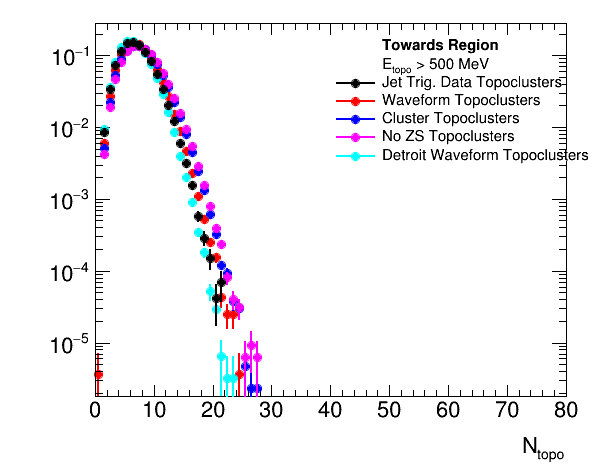

In [72]:
for i in range(len(h_ntopo_towards)):
    canvas = ROOT.TCanvas("canvas","",600,500)
    leg = ROOT.TLegend(.55,.65,.92,.92)
    leg.AddEntry("","#bf{Towards Region}","")
    leg.AddEntry("",thres_string[i],"")
    leg.AddEntry(h_ntopo_towards[i],"Jet Trig. Data Topoclusters","pl")
    leg.AddEntry(h_mc_ntopo_towards[i],"Waveform Topoclusters","pl")
    leg.AddEntry(h_clus_ntopo_towards[i],"Cluster Topoclusters","pl")
    leg.AddEntry(h_nz_ntopo_towards[i],"No ZS Topoclusters","pl")
    leg.AddEntry(h_dt_ntopo_towards[i],"Detroit Waveform Topoclusters","pl")
    h_ntopo_towards[i].SetStats(0)
    h_mc_ntopo_towards[i].SetStats(0)
    h_clus_ntopo_towards[i].SetStats(0)
    h_nz_ntopo_towards[i].SetStats(0)
    h_dt_ntopo_towards[i].SetStats(0)
    h_mc_ntopo_towards[i].SetLineColor(2)
    h_mc_ntopo_towards[i].SetMarkerColor(2)
    h_clus_ntopo_towards[i].SetLineColor(4)
    h_clus_ntopo_towards[i].SetMarkerColor(4)
    h_nz_ntopo_towards[i].SetLineColor(6)
    h_nz_ntopo_towards[i].SetMarkerColor(6)
    h_dt_ntopo_towards[i].SetLineColor(7)
    h_dt_ntopo_towards[i].SetMarkerColor(7)
    h_mc_ntopo_towards[i].SetMarkerStyle(20)
    h_clus_ntopo_towards[i].SetMarkerStyle(20)
    h_nz_ntopo_towards[i].SetMarkerStyle(20)
    h_mc_ntopo_towards[i].GetXaxis().SetRangeUser(0,80)
    h_mc_ntopo_towards[i].Draw()
    h_dt_ntopo_towards[i].Draw('same')
    h_clus_ntopo_towards[i].Draw('same')
    h_nz_ntopo_towards[i].Draw('same')
    h_ntopo_towards[i].Draw('same')
    h_mc_ntopo_towards[i].SetXTitle("N_{topo}") 
    canvas.SetLogy(1)
    leg.SetTextSize(0.035)
    leg.Draw()
    canvas.Draw()
    canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_ntopo_towards"+topo_thres[i]+"_Topoclusters.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_transverse-9999_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_transverse0_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_transverse100_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_transverse200_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_transver

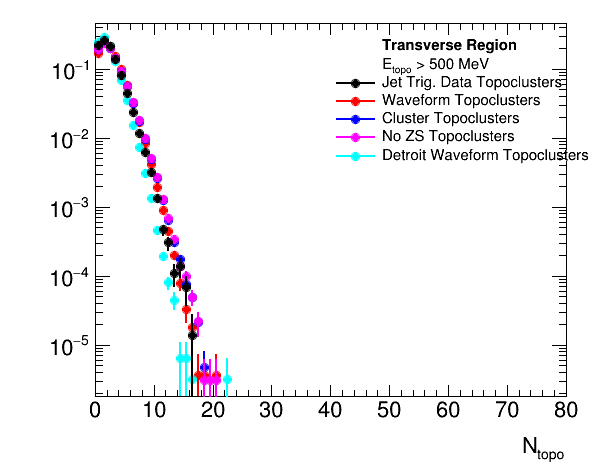

In [26]:
for i in range(len(h_ntopo_transverse)):
    canvas = ROOT.TCanvas("canvas","",600,500)
    leg = ROOT.TLegend(.55,.65,.92,.92)
    leg.AddEntry("","#bf{Transverse Region}","")
    leg.AddEntry("",thres_string[i],"")
    leg.AddEntry(h_ntopo_transverse[i],"Jet Trig. Data Topoclusters","pl")
    leg.AddEntry(h_mc_ntopo_transverse[i],"Waveform Topoclusters","pl")
    leg.AddEntry(h_clus_ntopo_transverse[i],"Cluster Topoclusters","pl")
    leg.AddEntry(h_nz_ntopo_transverse[i],"No ZS Topoclusters","pl")
    leg.AddEntry(h_dt_ntopo_transverse[i],"Detroit Waveform Topoclusters","pl")
    h_ntopo_transverse[i].SetStats(0)
    h_mc_ntopo_transverse[i].SetStats(0)
    h_clus_ntopo_transverse[i].SetStats(0)
    h_nz_ntopo_transverse[i].SetStats(0)
    h_dt_ntopo_transverse[i].SetStats(0)
    h_mc_ntopo_transverse[i].SetLineColor(2)
    h_mc_ntopo_transverse[i].SetMarkerColor(2)
    h_clus_ntopo_transverse[i].SetLineColor(4)
    h_clus_ntopo_transverse[i].SetMarkerColor(4)
    h_nz_ntopo_transverse[i].SetLineColor(6)
    h_nz_ntopo_transverse[i].SetMarkerColor(6)
    h_dt_ntopo_transverse[i].SetLineColor(7)
    h_dt_ntopo_transverse[i].SetMarkerColor(7)
    h_mc_ntopo_transverse[i].SetMarkerStyle(20)
    h_clus_ntopo_transverse[i].SetMarkerStyle(20)
    h_nz_ntopo_transverse[i].SetMarkerStyle(20)
    h_mc_ntopo_transverse[i].GetXaxis().SetRangeUser(0,80)
    h_mc_ntopo_transverse[i].Draw()
    h_dt_ntopo_transverse[i].Draw('same')
    h_clus_ntopo_transverse[i].Draw('same')
    h_nz_ntopo_transverse[i].Draw('same')
    h_ntopo_transverse[i].Draw('same')
    h_mc_ntopo_transverse[i].SetXTitle("N_{topo}") 
    canvas.SetLogy(1)
    leg.SetTextSize(0.035)
    leg.Draw()
    canvas.Draw()
    canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_ntopo_transverse"+topo_thres[i]+"_Topoclusters.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_away-9999_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_away0_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_away100_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_away200_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_ntopo_away300_Topoclusters.png has bee

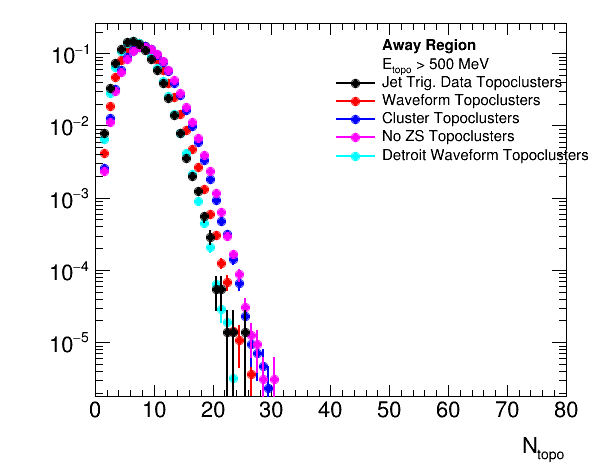

In [27]:
for i in range(len(h_ntopo_away)):
    canvas = ROOT.TCanvas("canvas","",600,500)
    leg = ROOT.TLegend(.55,.65,.92,.92)
    leg.AddEntry("","#bf{Away Region}","")
    leg.AddEntry("",thres_string[i],"")
    leg.AddEntry(h_ntopo_away[i],"Jet Trig. Data Topoclusters","pl")
    leg.AddEntry(h_mc_ntopo_away[i],"Waveform Topoclusters","pl")
    leg.AddEntry(h_clus_ntopo_away[i],"Cluster Topoclusters","pl")
    leg.AddEntry(h_nz_ntopo_away[i],"No ZS Topoclusters","pl")
    leg.AddEntry(h_dt_ntopo_away[i],"Detroit Waveform Topoclusters","pl")
    h_ntopo_away[i].SetStats(0)
    h_mc_ntopo_away[i].SetStats(0)
    h_clus_ntopo_away[i].SetStats(0)
    h_nz_ntopo_away[i].SetStats(0)
    h_dt_ntopo_away[i].SetStats(0)
    h_mc_ntopo_away[i].SetLineColor(2)
    h_mc_ntopo_away[i].SetMarkerColor(2)
    h_clus_ntopo_away[i].SetLineColor(4)
    h_clus_ntopo_away[i].SetMarkerColor(4)
    h_nz_ntopo_away[i].SetLineColor(6)
    h_nz_ntopo_away[i].SetMarkerColor(6)
    h_dt_ntopo_away[i].SetLineColor(7)
    h_dt_ntopo_away[i].SetMarkerColor(7)
    h_mc_ntopo_away[i].SetMarkerStyle(20)
    h_clus_ntopo_away[i].SetMarkerStyle(20)
    h_nz_ntopo_away[i].SetMarkerStyle(20)
    h_mc_ntopo_away[i].GetXaxis().SetRangeUser(0,80)
    h_mc_ntopo_away[i].Draw()
    h_dt_ntopo_away[i].Draw('same')
    h_clus_ntopo_away[i].Draw('same')
    h_nz_ntopo_away[i].Draw('same')
    h_ntopo_away[i].Draw('same')
    h_mc_ntopo_away[i].SetXTitle("N_{topo}") 
    canvas.SetLogy(1)
    leg.SetTextSize(0.035)
    leg.Draw()
    canvas.Draw()
    canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_ntopo_away"+topo_thres[i]+"_Topoclusters.png")

In [181]:
xlist0 = [-125,-25,75,175,275,475]
xlist1 = [-115,-15,85,185,285,485]
xlist2 = [-105,-5,95,195,295,495]
xlist3 = [-95,5,105,205,305,505]
xlist4 = [-85,15,115,215,315,515]
xlist5 = [-75,25,125,225,325,525]
xerr = [0,0,0,0,0,0]
x0 = np.array(xlist0, dtype='float64')
x1 = np.array(xlist1, dtype='float64')
x2 = np.array(xlist2, dtype='float64')
x3 = np.array(xlist3, dtype='float64')
x4 = np.array(xlist4, dtype='float64')
x5 = np.array(xlist5, dtype='float64')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_ntopo_towards.png has been created


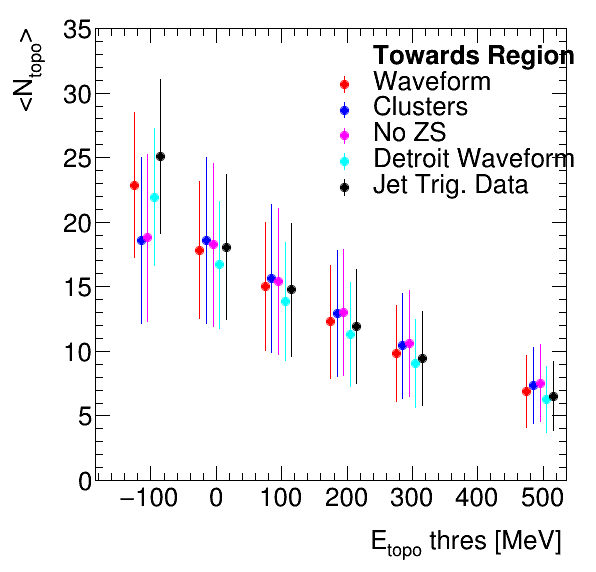

In [170]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 600, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kFullCircle,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kFullCircle
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_ntopo_towards, mean_mc_ntopo_transverse, mean_mc_ntopo_away, std_mc_ntopo_towards, std_mc_ntopo_transverse, std_mc_ntopo_away),
    ("clus_ntopo", x1, mean_clus_ntopo_towards, mean_clus_ntopo_transverse, mean_clus_ntopo_away, std_clus_ntopo_towards, std_clus_ntopo_transverse, std_clus_ntopo_away),
    ("nz_ntopo", x2, mean_nz_ntopo_towards, mean_nz_ntopo_transverse, mean_nz_ntopo_away, std_nz_ntopo_towards, std_nz_ntopo_transverse, std_nz_ntopo_away),
    ("dt_ntopo", x3, mean_dt_ntopo_towards, mean_dt_ntopo_transverse, mean_dt_ntopo_away, std_dt_ntopo_towards, std_dt_ntopo_transverse, std_dt_ntopo_away),
    ("ntopo", x4, mean_ntopo_towards, mean_ntopo_transverse, mean_ntopo_away, std_ntopo_towards, std_ntopo_transverse, std_ntopo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, towards_width, transverse_width, away_width in data_groups:
    n_points = len(towards)

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraphErrors(n_points, x, np.array(towards, dtype='float64'), np.array(xerr, dtype='float64'), np.array(towards_width, dtype='float64'))
    graph_transverse = ROOT.TGraphErrors(n_points, x, np.array(transverse, dtype='float64'), np.array(xerr, dtype='float64'), np.array(transverse_width, dtype='float64'))
    graph_away = ROOT.TGraphErrors(n_points, x, np.array(away, dtype='float64'), np.array(xerr, dtype='float64'), np.array(away_width, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if i % 3 == 0:
        if i == 0:
            graph.Draw("AP")
            graph.GetYaxis().SetRangeUser(0,35)
            graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
            graph.GetYaxis().SetTitle("<N_{topo}>")
        else:
             graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.53, 0.65, 0.92, 0.92)
legend.SetNColumns(1)
legend.AddEntry("","#bf{Towards Region}","")
legend.AddEntry(graphs[1], "Waveform", "pe")
legend.AddEntry(graphs[4], "Clusters", "pe")
legend.AddEntry(graphs[7], "No ZS", "pe")
legend.AddEntry(graphs[10], "Detroit Waveform", "ep")
legend.AddEntry(graphs[13], "Jet Trig. Data", "pe")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_ntopo_towards.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_ntopo_transverse.png has been created


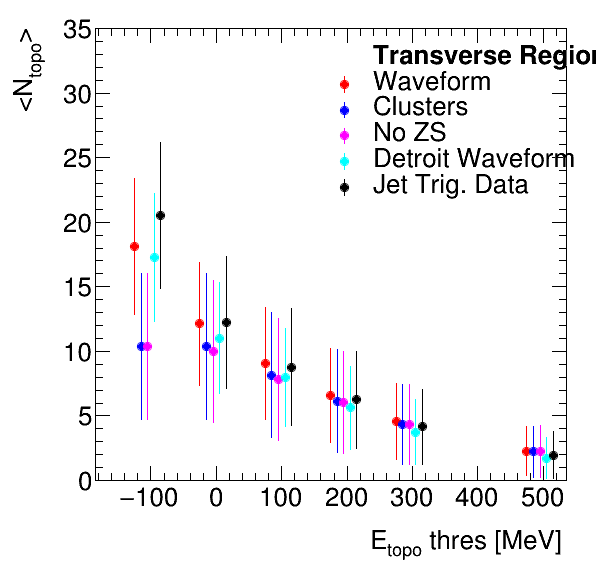

In [169]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 600, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kFullCircle,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kFullCircle
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_ntopo_towards, mean_mc_ntopo_transverse, mean_mc_ntopo_away, std_mc_ntopo_towards, std_mc_ntopo_transverse, std_mc_ntopo_away),
    ("clus_ntopo", x1, mean_clus_ntopo_towards, mean_clus_ntopo_transverse, mean_clus_ntopo_away, std_clus_ntopo_towards, std_clus_ntopo_transverse, std_clus_ntopo_away),
    ("nz_ntopo", x2, mean_nz_ntopo_towards, mean_nz_ntopo_transverse, mean_nz_ntopo_away, std_nz_ntopo_towards, std_nz_ntopo_transverse, std_nz_ntopo_away),
    ("dt_ntopo", x3, mean_dt_ntopo_towards, mean_dt_ntopo_transverse, mean_dt_ntopo_away, std_dt_ntopo_towards, std_dt_ntopo_transverse, std_dt_ntopo_away),
    ("ntopo", x4, mean_ntopo_towards, mean_ntopo_transverse, mean_ntopo_away, std_ntopo_towards, std_ntopo_transverse, std_ntopo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, towards_width, transverse_width, away_width in data_groups:
    n_points = len(towards)

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraphErrors(n_points, x, np.array(towards, dtype='float64'), np.array(xerr, dtype='float64'), np.array(towards_width, dtype='float64'))
    graph_transverse = ROOT.TGraphErrors(n_points, x, np.array(transverse, dtype='float64'), np.array(xerr, dtype='float64'), np.array(transverse_width, dtype='float64'))
    graph_away = ROOT.TGraphErrors(n_points, x, np.array(away, dtype='float64'), np.array(xerr, dtype='float64'), np.array(away_width, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if (i-1) % 3 == 0:
        if i == 1:
            graph.Draw("AP")
            graph.GetYaxis().SetRangeUser(0,35)
            graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
            graph.GetYaxis().SetTitle("<N_{topo}>")
        else:
             graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.53, 0.65, 0.92, 0.92)
legend.SetNColumns(1)
legend.AddEntry("","#bf{Transverse Region}","")
legend.AddEntry(graphs[1], "Waveform", "pe")
legend.AddEntry(graphs[4], "Clusters", "pe")
legend.AddEntry(graphs[7], "No ZS", "pe")
legend.AddEntry(graphs[10], "Detroit Waveform", "ep")
legend.AddEntry(graphs[13], "Jet Trig. Data", "pe")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_ntopo_transverse.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_ntopo_away.png has been created


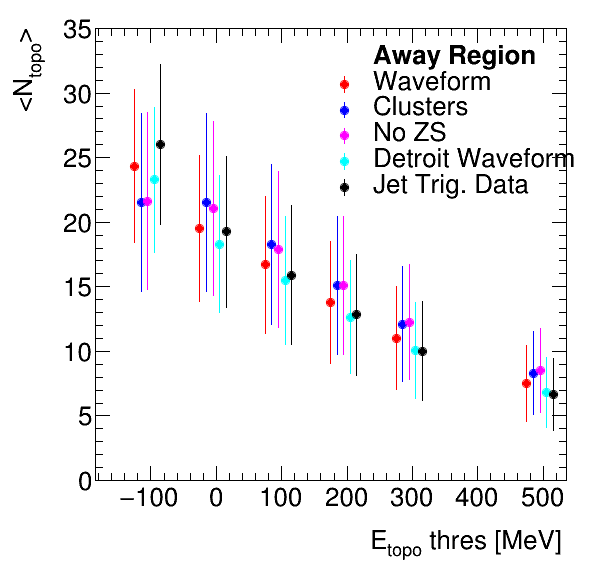

In [168]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 600, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kFullCircle,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kFullCircle
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_ntopo_towards, mean_mc_ntopo_transverse, mean_mc_ntopo_away, std_mc_ntopo_towards, std_mc_ntopo_transverse, std_mc_ntopo_away),
    ("clus_ntopo", x1, mean_clus_ntopo_towards, mean_clus_ntopo_transverse, mean_clus_ntopo_away, std_clus_ntopo_towards, std_clus_ntopo_transverse, std_clus_ntopo_away),
    ("nz_ntopo", x2, mean_nz_ntopo_towards, mean_nz_ntopo_transverse, mean_nz_ntopo_away, std_nz_ntopo_towards, std_nz_ntopo_transverse, std_nz_ntopo_away),
    ("dt_ntopo", x3, mean_dt_ntopo_towards, mean_dt_ntopo_transverse, mean_dt_ntopo_away, std_dt_ntopo_towards, std_dt_ntopo_transverse, std_dt_ntopo_away),
    ("ntopo", x4, mean_ntopo_towards, mean_ntopo_transverse, mean_ntopo_away, std_ntopo_towards, std_ntopo_transverse, std_ntopo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, towards_width, transverse_width, away_width in data_groups:
    n_points = len(towards)

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraphErrors(n_points, x, np.array(towards, dtype='float64'), np.array(xerr, dtype='float64'), np.array(towards_width, dtype='float64'))
    graph_transverse = ROOT.TGraphErrors(n_points, x, np.array(transverse, dtype='float64'), np.array(xerr, dtype='float64'), np.array(transverse_width, dtype='float64'))
    graph_away = ROOT.TGraphErrors(n_points, x, np.array(away, dtype='float64'), np.array(xerr, dtype='float64'), np.array(away_width, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if (i-2) % 3 == 0:
        if i == 2:
            graph.Draw("AP")
            graph.GetYaxis().SetRangeUser(0,35)
            graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
            graph.GetYaxis().SetTitle("<N_{topo}>")
        else:
             graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.53, 0.65, 0.92, 0.92)
legend.SetNColumns(1)
legend.AddEntry("","#bf{Away Region}","")
legend.AddEntry(graphs[1], "Waveform", "pe")
legend.AddEntry(graphs[4], "Clusters", "pe")
legend.AddEntry(graphs[7], "No ZS", "pe")
legend.AddEntry(graphs[10], "Detroit Waveform", "ep")
legend.AddEntry(graphs[13], "Jet Trig. Data", "pe")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_ntopo_away.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_ntopo.png has been created


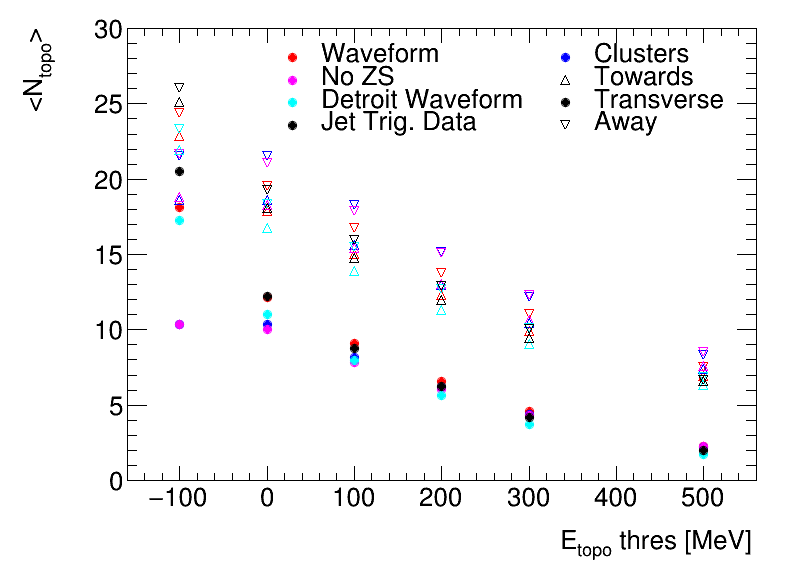

In [151]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 800, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kOpenTriangleUp,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kOpenTriangleDown
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_ntopo_towards, mean_mc_ntopo_transverse, mean_mc_ntopo_away, std_mc_ntopo_towards, std_mc_ntopo_transverse, std_mc_ntopo_away),
    ("clus_ntopo", x1, mean_clus_ntopo_towards, mean_clus_ntopo_transverse, mean_clus_ntopo_away, std_clus_ntopo_towards, std_clus_ntopo_transverse, std_clus_ntopo_away),
    ("nz_ntopo", x2, mean_nz_ntopo_towards, mean_nz_ntopo_transverse, mean_nz_ntopo_away, std_nz_ntopo_towards, std_nz_ntopo_transverse, std_nz_ntopo_away),
    ("dt_ntopo", x3, mean_dt_ntopo_towards, mean_dt_ntopo_transverse, mean_dt_ntopo_away, std_dt_ntopo_towards, std_dt_ntopo_transverse, std_dt_ntopo_away),
    ("ntopo", x4, mean_ntopo_towards, mean_ntopo_transverse, mean_ntopo_away, std_ntopo_towards, std_ntopo_transverse, std_ntopo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, width_towards, width_transverse, width_away in data_groups:
    n_points = len(towards)
    xlist = [-100,0,100,200,300,500]
    x = np.array(xlist, dtype='float64')

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraph(n_points, x, np.array(towards, dtype='float64'))
    graph_transverse = ROOT.TGraph(n_points, x, np.array(transverse, dtype='float64'))
    graph_away = ROOT.TGraph(n_points, x, np.array(away, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if i == 0:
        graph.Draw("AP")
        graph.GetYaxis().SetRangeUser(0,30)
        graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
        graph.GetYaxis().SetTitle("<N_{topo}>")
    else:
         graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.33, 0.76, 0.92, 0.92)
legend.SetNColumns(2)
legend.AddEntry(graphs[1], "Waveform", "p")
legend.AddEntry(graphs[4], "Clusters", "p")
legend.AddEntry(graphs[7], "No ZS", "p")
legend.AddEntry(graphs[12], "Towards", "p")
legend.AddEntry(graphs[10], "Detroit Waveform", "p")
legend.AddEntry(graphs[13], "Transverse", "p")
legend.AddEntry(graphs[13], "Jet Trig. Data", "p")
legend.AddEntry(graphs[14], "Away", "p")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_ntopo.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_towards-9999_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_towards0_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_towards100_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_towards200_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/

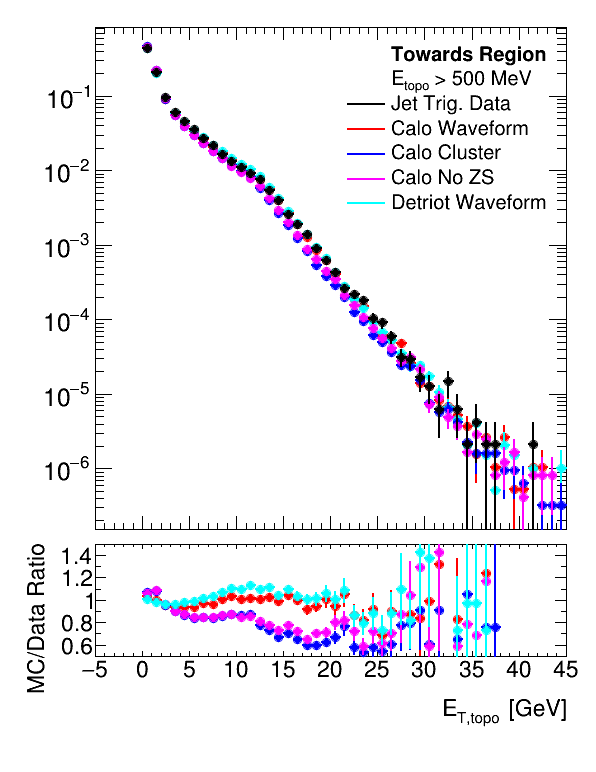

In [108]:
for i in range(len(h_topo_towards)):
    canvas = ROOT.TCanvas("canvas", "", 600, 800)
    pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
    pad1.Draw()
    pad1.cd()
    pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

    # Customize the histograms (color, marker, etc.)
    h_topo_towards[i].SetStats(0)
    h_mc_topo_towards[i].SetStats(0)
    h_clus_topo_towards[i].SetStats(0)
    h_nz_topo_towards[i].SetStats(0)
    h_mc_topo_towards[i].SetLineColor(2)
    h_mc_topo_towards[i].SetMarkerColor(2)
    h_clus_topo_towards[i].SetLineColor(4)
    h_clus_topo_towards[i].SetMarkerColor(4)
    h_nz_topo_towards[i].SetLineColor(6)
    h_nz_topo_towards[i].SetMarkerColor(6)
    h_dt_topo_towards[i].SetLineColor(7)
    h_dt_topo_towards[i].SetMarkerColor(7)

    h_mc_topo_towards[i].GetXaxis().SetLabelSize(0)
    h_topo_towards[i].GetXaxis().SetLabelSize(0)
    h_clus_topo_towards[i].GetXaxis().SetLabelSize(0)
    h_nz_topo_towards[i].GetXaxis().SetLabelSize(0)
    h_dt_topo_towards[i].GetXaxis().SetLabelSize(0)
    
    h_mc_topo_towards[i].GetXaxis().SetRangeUser(-5,45)

    h_mc_topo_towards[i].Draw()
    h_dt_topo_towards[i].Draw("same")
    h_clus_topo_towards[i].Draw("same")
    h_nz_topo_towards[i].Draw("same")  # Uncomment if needed
    h_topo_towards[i].Draw("same")

    # Add legend
    leg = ROOT.TLegend(.57, .6, .92, .92)
    leg.AddEntry("","#bf{Towards Region}","")
    leg.AddEntry("",thres_string[i],"")
    leg.AddEntry(h_topo_towards[i],"Jet Trig. Data","l")
    leg.AddEntry(h_mc_topo_towards[i],"Calo Waveform","l")
    leg.AddEntry(h_clus_topo_towards[i],"Calo Cluster","l")
    leg.AddEntry(h_nz_topo_towards[i],"Calo No ZS","l")
    leg.AddEntry(h_dt_topo_towards[i],"Detriot Waveform","l")
    leg.Draw()
    leg.SetTextSize(0.04)

    canvas.cd()
    pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0.02)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    ratio1 = h_mc_topo_towards[i].Clone("ratio1")
    ratio1.Divide(h_topo_towards[i])
    ratio2 = h_clus_topo_towards[i].Clone("ratio2")
    ratio2.Divide(h_topo_towards[i])
    ratio3 = h_nz_topo_towards[i].Clone("ratio3")
    ratio3.Divide(h_topo_towards[i])
    ratio4 = h_dt_topo_towards[i].Clone("ratio4")
    ratio4.Divide(h_topo_towards[i])

    ratio1.GetYaxis().SetTitle("MC/Data Ratio")
    ratio1.GetYaxis().SetNdivisions(208)
    ratio1.GetYaxis().SetRangeUser(0.5,1.5)
    ratio1.GetYaxis().SetTitleSize(25)
    ratio1.GetYaxis().SetTitleFont(43)
    ratio1.GetYaxis().SetTitleOffset(1.5)
    ratio1.GetYaxis().SetLabelFont(43)
    ratio1.GetYaxis().SetLabelSize(25)
    ratio1.GetXaxis().SetTitle("E_{T,topo} [GeV]")
    ratio1.GetXaxis().SetTitleSize(25)
    ratio1.GetXaxis().SetTitleFont(43)
    ratio1.GetXaxis().SetTitleOffset(0)
    ratio1.GetXaxis().SetLabelFont(43)
    ratio1.GetXaxis().SetLabelSize(25)
    
    ratio1.GetXaxis().SetRangeUser(-5,45)

    # Draw ratio plots
    ratio1.Draw("ep")
    ratio2.Draw("same ep")
    ratio3.Draw("same ep")  # Uncomment if needed
    ratio4.Draw("same ep")

    # Update canvas
    canvas.Update()
    canvas.Draw()
    canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_topo_spectra_towards"+topo_thres[i]+"_Topoclusters.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_transverse-9999_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_transverse0_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_transverse100_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_transverse200_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/re

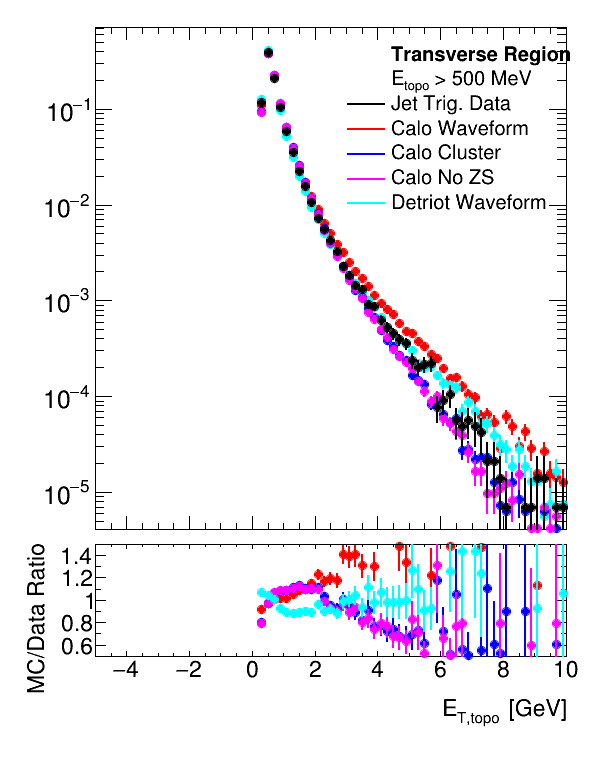

In [109]:
for i in range(len(h_topo_transverse)):
    canvas = ROOT.TCanvas("canvas", "", 600, 800)
    pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
    pad1.Draw()
    pad1.cd()
    pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

    # Customize the histograms (color, marker, etc.)
    h_topo_transverse[i].SetStats(0)
    h_mc_topo_transverse[i].SetStats(0)
    h_clus_topo_transverse[i].SetStats(0)
    h_nz_topo_transverse[i].SetStats(0)
    h_mc_topo_transverse[i].SetLineColor(2)
    h_mc_topo_transverse[i].SetMarkerColor(2)
    h_clus_topo_transverse[i].SetLineColor(4)
    h_clus_topo_transverse[i].SetMarkerColor(4)
    h_nz_topo_transverse[i].SetLineColor(6)
    h_nz_topo_transverse[i].SetMarkerColor(6)
    h_dt_topo_transverse[i].SetLineColor(7)
    h_dt_topo_transverse[i].SetMarkerColor(7)

    h_mc_topo_transverse[i].GetXaxis().SetLabelSize(0)
    h_topo_transverse[i].GetXaxis().SetLabelSize(0)
    h_clus_topo_transverse[i].GetXaxis().SetLabelSize(0)
    h_nz_topo_transverse[i].GetXaxis().SetLabelSize(0)
    h_dt_topo_transverse[i].GetXaxis().SetLabelSize(0)
    
    h_mc_topo_transverse[i].GetXaxis().SetRangeUser(-5,10)

    h_mc_topo_transverse[i].Draw()
    h_dt_topo_transverse[i].Draw("same")
    h_clus_topo_transverse[i].Draw("same")
    h_nz_topo_transverse[i].Draw("same")  # Uncomment if needed
    h_topo_transverse[i].Draw("same")

    # Add legend
    leg = ROOT.TLegend(.57, .6, .92, .92)
    leg.AddEntry("","#bf{Transverse Region}","")
    leg.AddEntry("",thres_string[i],"")
    leg.AddEntry(h_topo_transverse[i],"Jet Trig. Data","l")
    leg.AddEntry(h_mc_topo_transverse[i],"Calo Waveform","l")
    leg.AddEntry(h_clus_topo_transverse[i],"Calo Cluster","l")
    leg.AddEntry(h_nz_topo_transverse[i],"Calo No ZS","l")
    leg.AddEntry(h_dt_topo_transverse[i],"Detriot Waveform","l")
    leg.Draw()
    leg.SetTextSize(0.04)

    canvas.cd()
    pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0.02)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    ratio1 = h_mc_topo_transverse[i].Clone("ratio1")
    ratio1.Divide(h_topo_transverse[i])
    ratio2 = h_clus_topo_transverse[i].Clone("ratio2")
    ratio2.Divide(h_topo_transverse[i])
    ratio3 = h_nz_topo_transverse[i].Clone("ratio3")
    ratio3.Divide(h_topo_transverse[i])
    ratio4 = h_dt_topo_transverse[i].Clone("ratio4")
    ratio4.Divide(h_topo_transverse[i])

    ratio1.GetYaxis().SetTitle("MC/Data Ratio")
    ratio1.GetYaxis().SetNdivisions(208)
    ratio1.GetYaxis().SetRangeUser(0.5,1.5)
    ratio1.GetYaxis().SetTitleSize(25)
    ratio1.GetYaxis().SetTitleFont(43)
    ratio1.GetYaxis().SetTitleOffset(1.5)
    ratio1.GetYaxis().SetLabelFont(43)
    ratio1.GetYaxis().SetLabelSize(25)
    ratio1.GetXaxis().SetTitle("E_{T,topo} [GeV]")
    ratio1.GetXaxis().SetTitleSize(25)
    ratio1.GetXaxis().SetTitleFont(43)
    ratio1.GetXaxis().SetTitleOffset(0)
    ratio1.GetXaxis().SetLabelFont(43)
    ratio1.GetXaxis().SetLabelSize(25)
    
    ratio1.GetXaxis().SetRangeUser(-5,10)

    # Draw ratio plots
    ratio1.Draw("ep")
    ratio2.Draw("same ep")
    ratio3.Draw("same ep")  # Uncomment if needed
    ratio4.Draw("same ep")

    # Update canvas
    canvas.Update()
    canvas.Draw()
    canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_topo_spectra_transverse"+topo_thres[i]+"_Topoclusters.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_away-9999_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_away0_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_away100_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spectra_away200_Topoclusters.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_topo_spect

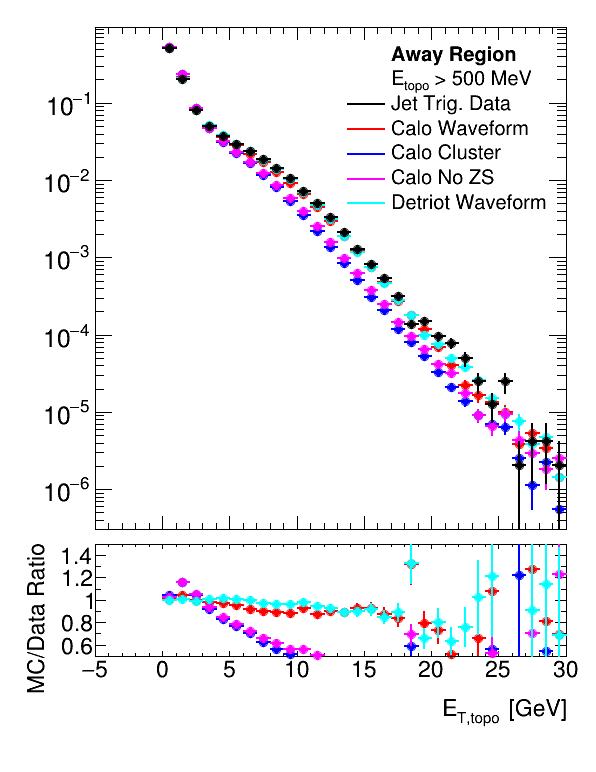

In [110]:
for i in range(len(h_topo_away)):
    canvas = ROOT.TCanvas("canvas", "", 600, 800)
    pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
    pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
    pad1.Draw()
    pad1.cd()
    pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

    # Customize the histograms (color, marker, etc.)
    h_topo_away[i].SetStats(0)
    h_mc_topo_away[i].SetStats(0)
    h_clus_topo_away[i].SetStats(0)
    h_nz_topo_away[i].SetStats(0)
    h_mc_topo_away[i].SetLineColor(2)
    h_mc_topo_away[i].SetMarkerColor(2)
    h_clus_topo_away[i].SetLineColor(4)
    h_clus_topo_away[i].SetMarkerColor(4)
    h_nz_topo_away[i].SetLineColor(6)
    h_nz_topo_away[i].SetMarkerColor(6)
    h_dt_topo_away[i].SetLineColor(7)
    h_dt_topo_away[i].SetMarkerColor(7)

    h_mc_topo_away[i].GetXaxis().SetLabelSize(0)
    h_topo_away[i].GetXaxis().SetLabelSize(0)
    h_clus_topo_away[i].GetXaxis().SetLabelSize(0)
    h_nz_topo_away[i].GetXaxis().SetLabelSize(0)
    h_dt_topo_away[i].GetXaxis().SetLabelSize(0)
    
    h_mc_topo_away[i].GetXaxis().SetRangeUser(-5,30)

    h_mc_topo_away[i].Draw()
    h_dt_topo_away[i].Draw("same")
    h_clus_topo_away[i].Draw("same")
    h_nz_topo_away[i].Draw("same")  # Uncomment if needed
    h_topo_away[i].Draw("same")

    # Add legend
    leg = ROOT.TLegend(.57, .6, .92, .92)
    leg.AddEntry("","#bf{Away Region}","")
    leg.AddEntry("",thres_string[i],"")
    leg.AddEntry(h_topo_away[i],"Jet Trig. Data","l")
    leg.AddEntry(h_mc_topo_away[i],"Calo Waveform","l")
    leg.AddEntry(h_clus_topo_away[i],"Calo Cluster","l")
    leg.AddEntry(h_nz_topo_away[i],"Calo No ZS","l")
    leg.AddEntry(h_dt_topo_away[i],"Detriot Waveform","l")
    leg.Draw()
    leg.SetTextSize(0.04)

    canvas.cd()
    pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
    pad2.SetTopMargin(0.02)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    ratio1 = h_mc_topo_away[i].Clone("ratio1")
    ratio1.Divide(h_topo_away[i])
    ratio2 = h_clus_topo_away[i].Clone("ratio2")
    ratio2.Divide(h_topo_away[i])
    ratio3 = h_nz_topo_away[i].Clone("ratio3")
    ratio3.Divide(h_topo_away[i])
    ratio4 = h_dt_topo_away[i].Clone("ratio4")
    ratio4.Divide(h_topo_away[i])

    ratio1.GetYaxis().SetTitle("MC/Data Ratio")
    ratio1.GetYaxis().SetNdivisions(208)
    ratio1.GetYaxis().SetRangeUser(0.5,1.5)
    ratio1.GetYaxis().SetTitleSize(25)
    ratio1.GetYaxis().SetTitleFont(43)
    ratio1.GetYaxis().SetTitleOffset(1.5)
    ratio1.GetYaxis().SetLabelFont(43)
    ratio1.GetYaxis().SetLabelSize(25)
    ratio1.GetXaxis().SetTitle("E_{T,topo} [GeV]")
    ratio1.GetXaxis().SetTitleSize(25)
    ratio1.GetXaxis().SetTitleFont(43)
    ratio1.GetXaxis().SetTitleOffset(0)
    ratio1.GetXaxis().SetLabelFont(43)
    ratio1.GetXaxis().SetLabelSize(25)
    
    ratio1.GetXaxis().SetRangeUser(-5,30)

    # Draw ratio plots
    ratio1.Draw("ep")
    ratio2.Draw("same ep")
    ratio3.Draw("same ep")  # Uncomment if needed
    ratio4.Draw("same ep")

    # Update canvas
    canvas.Update()
    canvas.Draw()
    canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_topo_spectra_away"+topo_thres[i]+"_Topoclusters.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_etopo.png has been created


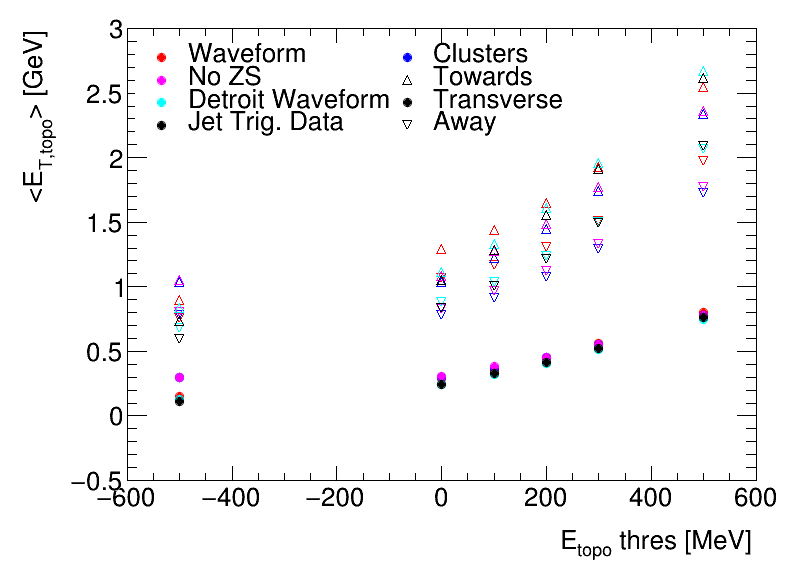

In [163]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 800, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kOpenTriangleUp,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kOpenTriangleDown
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", mean_mc_topo_towards, mean_mc_topo_transverse, mean_mc_topo_away),
    ("clus_ntopo", mean_clus_topo_towards, mean_clus_topo_transverse, mean_clus_topo_away),
    ("nz_ntopo", mean_nz_topo_towards, mean_nz_topo_transverse, mean_nz_topo_away),
    ("dt_ntopo", mean_dt_topo_towards, mean_dt_topo_transverse, mean_dt_topo_away),
    ("ntopo", mean_topo_towards, mean_topo_transverse, mean_topo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, towards, transverse, away in data_groups:
    n_points = len(towards)
    xlist = [-500,0,100,200,300,500]
    x = np.array(xlist, dtype='float64')

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraph(n_points, x, np.array(towards, dtype='float64'))
    graph_transverse = ROOT.TGraph(n_points, x, np.array(transverse, dtype='float64'))
    graph_away = ROOT.TGraph(n_points, x, np.array(away, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if i == 0:
        graph.Draw("AP")
        graph.GetYaxis().SetRangeUser(-0.5,3)
        graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
        graph.GetYaxis().SetTitle("<E_{T,topo}> [GeV]")
    else:
         graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.17, 0.76, 0.7, 0.92)
legend.SetNColumns(2)
legend.AddEntry(graphs[1], "Waveform", "p")
legend.AddEntry(graphs[4], "Clusters", "p")
legend.AddEntry(graphs[7], "No ZS", "p")
legend.AddEntry(graphs[12], "Towards", "p")
legend.AddEntry(graphs[10], "Detroit Waveform", "p")
legend.AddEntry(graphs[13], "Transverse", "p")
legend.AddEntry(graphs[13], "Jet Trig. Data", "p")
legend.AddEntry(graphs[14], "Away", "p")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_etopo.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_etopo_towards.png has been created


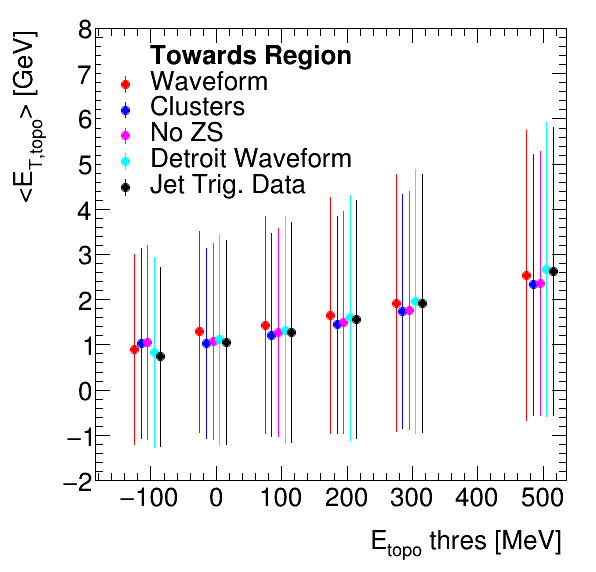

In [171]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 600, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kFullCircle,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kFullCircle
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_topo_towards, mean_mc_topo_transverse, mean_mc_topo_away, std_mc_topo_towards, std_mc_topo_transverse, std_mc_topo_away),
    ("clus_ntopo", x1, mean_clus_topo_towards, mean_clus_topo_transverse, mean_clus_topo_away, std_clus_topo_towards, std_clus_topo_transverse, std_clus_topo_away),
    ("nz_ntopo", x2, mean_nz_topo_towards, mean_nz_topo_transverse, mean_nz_topo_away, std_nz_topo_towards, std_nz_topo_transverse, std_nz_topo_away),
    ("dt_ntopo", x3, mean_dt_topo_towards, mean_dt_topo_transverse, mean_dt_topo_away, std_dt_topo_towards, std_dt_topo_transverse, std_dt_topo_away),
    ("ntopo", x4, mean_topo_towards, mean_topo_transverse, mean_topo_away, std_topo_towards, std_topo_transverse, std_topo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, towards_width, transverse_width, away_width in data_groups:
    n_points = len(towards)

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraphErrors(n_points, x, np.array(towards, dtype='float64'), np.array(xerr, dtype='float64'), np.array(towards_width, dtype='float64'))
    graph_transverse = ROOT.TGraphErrors(n_points, x, np.array(transverse, dtype='float64'), np.array(xerr, dtype='float64'), np.array(transverse_width, dtype='float64'))
    graph_away = ROOT.TGraphErrors(n_points, x, np.array(away, dtype='float64'), np.array(xerr, dtype='float64'), np.array(away_width, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if i % 3 == 0:
        if i == 0:
            graph.Draw("AP")
            graph.GetYaxis().SetRangeUser(-2,8)
            graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
            graph.GetYaxis().SetTitle("<E_{T,topo}> [GeV]")
        else:
             graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.17, 0.65, 0.5, 0.92)
legend.SetNColumns(1)
legend.AddEntry("","#bf{Towards Region}","")
legend.AddEntry(graphs[1], "Waveform", "pe")
legend.AddEntry(graphs[4], "Clusters", "pe")
legend.AddEntry(graphs[7], "No ZS", "pe")
legend.AddEntry(graphs[10], "Detroit Waveform", "ep")
legend.AddEntry(graphs[13], "Jet Trig. Data", "pe")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_etopo_towards.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_etopo_transverse.png has been created


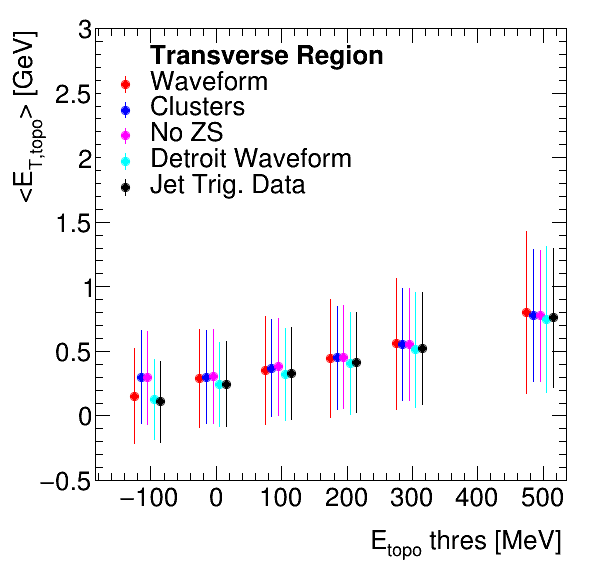

In [172]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 600, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kFullCircle,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kFullCircle
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_topo_towards, mean_mc_topo_transverse, mean_mc_topo_away, std_mc_topo_towards, std_mc_topo_transverse, std_mc_topo_away),
    ("clus_ntopo", x1, mean_clus_topo_towards, mean_clus_topo_transverse, mean_clus_topo_away, std_clus_topo_towards, std_clus_topo_transverse, std_clus_topo_away),
    ("nz_ntopo", x2, mean_nz_topo_towards, mean_nz_topo_transverse, mean_nz_topo_away, std_nz_topo_towards, std_nz_topo_transverse, std_nz_topo_away),
    ("dt_ntopo", x3, mean_dt_topo_towards, mean_dt_topo_transverse, mean_dt_topo_away, std_dt_topo_towards, std_dt_topo_transverse, std_dt_topo_away),
    ("ntopo", x4, mean_topo_towards, mean_topo_transverse, mean_topo_away, std_topo_towards, std_topo_transverse, std_topo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, towards_width, transverse_width, away_width in data_groups:
    n_points = len(towards)

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraphErrors(n_points, x, np.array(towards, dtype='float64'), np.array(xerr, dtype='float64'), np.array(towards_width, dtype='float64'))
    graph_transverse = ROOT.TGraphErrors(n_points, x, np.array(transverse, dtype='float64'), np.array(xerr, dtype='float64'), np.array(transverse_width, dtype='float64'))
    graph_away = ROOT.TGraphErrors(n_points, x, np.array(away, dtype='float64'), np.array(xerr, dtype='float64'), np.array(away_width, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if (i-1) % 3 == 0:
        if i == 1:
            graph.Draw("AP")
            graph.GetYaxis().SetRangeUser(-0.5,3)
            graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
            graph.GetYaxis().SetTitle("<E_{T,topo}> [GeV]")
        else:
             graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.17, 0.65, 0.5, 0.92)
legend.SetNColumns(1)
legend.AddEntry("","#bf{Transverse Region}","")
legend.AddEntry(graphs[1], "Waveform", "pe")
legend.AddEntry(graphs[4], "Clusters", "pe")
legend.AddEntry(graphs[7], "No ZS", "pe")
legend.AddEntry(graphs[10], "Detroit Waveform", "ep")
legend.AddEntry(graphs[13], "Jet Trig. Data", "pe")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_etopo_transverse.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/fall_2024/results_11_11/h_mean_etopo_away.png has been created


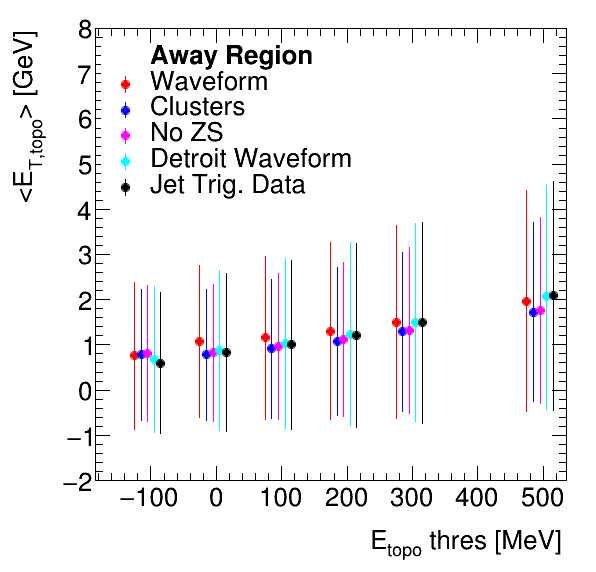

In [173]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graph", 600, 600)

# Define marker styles and colors
marker_styles = {
    "towards": ROOT.kFullCircle,
    "transverse": ROOT.kFullCircle,
    "away": ROOT.kFullCircle
}

colors = {
    "ntopo": ROOT.kBlack,
    "mc_ntopo": ROOT.kRed,
    "clus_ntopo": ROOT.kBlue,
    "nz_ntopo": ROOT.kMagenta,
    "dt_ntopo": ROOT.kCyan
}

# Prepare a list of all data groups
data_groups = [
    ("mc_ntopo", x0, mean_mc_topo_towards, mean_mc_topo_transverse, mean_mc_topo_away, std_mc_topo_towards, std_mc_topo_transverse, std_mc_topo_away),
    ("clus_ntopo", x1, mean_clus_topo_towards, mean_clus_topo_transverse, mean_clus_topo_away, std_clus_topo_towards, std_clus_topo_transverse, std_clus_topo_away),
    ("nz_ntopo", x2, mean_nz_topo_towards, mean_nz_topo_transverse, mean_nz_topo_away, std_nz_topo_towards, std_nz_topo_transverse, std_nz_topo_away),
    ("dt_ntopo", x3, mean_dt_topo_towards, mean_dt_topo_transverse, mean_dt_topo_away, std_dt_topo_towards, std_dt_topo_transverse, std_dt_topo_away),
    ("ntopo", x4, mean_topo_towards, mean_topo_transverse, mean_topo_away, std_topo_towards, std_topo_transverse, std_topo_away)
]

graphs = []
    
# Create TGraphs for each data group
for group, x, towards, transverse, away, towards_width, transverse_width, away_width in data_groups:
    n_points = len(towards)

    # Create graphs for towards, transverse, and away
    graph_towards = ROOT.TGraphErrors(n_points, x, np.array(towards, dtype='float64'), np.array(xerr, dtype='float64'), np.array(towards_width, dtype='float64'))
    graph_transverse = ROOT.TGraphErrors(n_points, x, np.array(transverse, dtype='float64'), np.array(xerr, dtype='float64'), np.array(transverse_width, dtype='float64'))
    graph_away = ROOT.TGraphErrors(n_points, x, np.array(away, dtype='float64'), np.array(xerr, dtype='float64'), np.array(away_width, dtype='float64'))

    # Set marker styles and colors
    graph_towards.SetMarkerStyle(marker_styles["towards"])
    graph_transverse.SetMarkerStyle(marker_styles["transverse"])
    graph_away.SetMarkerStyle(marker_styles["away"])

    graph_towards.SetMarkerColor(colors[group])
    graph_transverse.SetMarkerColor(colors[group])
    graph_away.SetMarkerColor(colors[group])

    graph_towards.SetLineColor(colors[group])
    graph_transverse.SetLineColor(colors[group])
    graph_away.SetLineColor(colors[group])

    graphs.extend([graph_towards, graph_transverse, graph_away])

# Draw all graphs on the same canvas
for i, graph in enumerate(graphs):
    if (i-2) % 3 == 0:
        if i == 2:
            graph.Draw("AP")
            graph.GetYaxis().SetRangeUser(-2,8)
            graph.GetXaxis().SetTitle("E_{topo} thres [MeV]")
            graph.GetYaxis().SetTitle("<E_{T,topo}> [GeV]")
        else:
             graph.Draw("P SAME")

# Adding a legend
legend = ROOT.TLegend(0.17, 0.65, 0.5, 0.92)
legend.SetNColumns(1)
legend.AddEntry("","#bf{Away Region}","")
legend.AddEntry(graphs[1], "Waveform", "pe")
legend.AddEntry(graphs[4], "Clusters", "pe")
legend.AddEntry(graphs[7], "No ZS", "pe")
legend.AddEntry(graphs[10], "Detroit Waveform", "ep")
legend.AddEntry(graphs[13], "Jet Trig. Data", "pe")
legend.Draw()

# Update and display the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_mean_etopo_away.png")

In [219]:
#f2 = ROOT.TFile.Open("pt10cut/dijet_calo_analysis_fullrunlist.root")
f2 = ROOT.TFile.Open("ue_unfolding/dijet_calo_analysis_data_topo_pt7cut_wAj_wntopo.root")
h_towards = TH1F(f2.Get('h_topo-9999_towards'))
h_transverse = TH1F(f2.Get('h_topo-9999_transverse'))
h_away = TH1F(f2.Get('h_topo-9999_away'))
h_towards.Rebin(2)
h_transverse.Rebin(2)
h_away.Rebin(2)
h_towards.Scale(1.0/h_towards.GetBinContent(h_towards.FindBin(-0.2)))
h_transverse.Scale(1.0/h_transverse.GetBinContent(h_transverse.FindBin(-0.2)))
h_away.Scale(1.0/h_away.GetBinContent(h_away.FindBin(-0.2)))
h_towards.SetDirectory(0)
h_transverse.SetDirectory(0)
h_away.SetDirectory(0)
f2.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


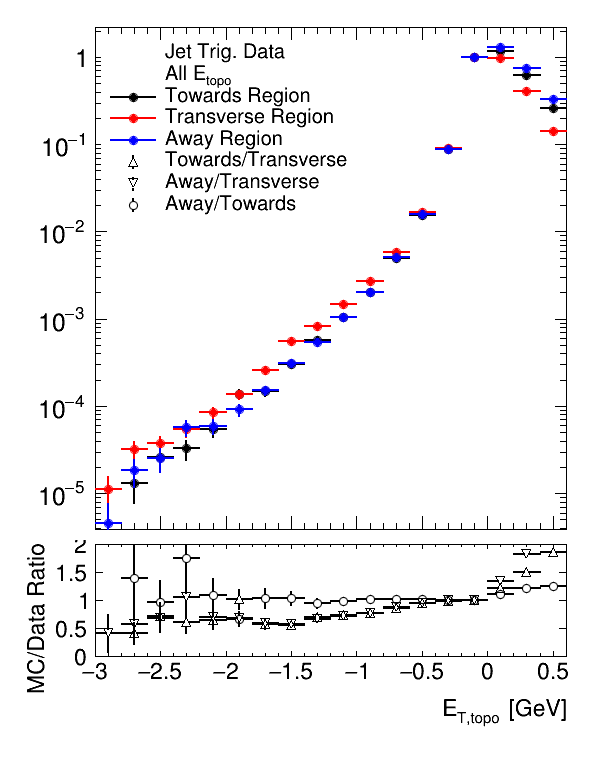

In [220]:
canvas = ROOT.TCanvas("canvas", "", 600, 800)
pad1 = ROOT.TPad("pad1", "", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # Adjust the margin for better separation
pad1.Draw()
pad1.cd()
pad1.SetLogy(1)  # Set logarithmic scale for the spectra plot

 # Customize the histograms (color, marker, etc.)
h_towards.SetStats(0)
h_towards.GetXaxis().SetLabelSize(0)
h_transverse.SetStats(0)
h_transverse.GetXaxis().SetLabelSize(0)
h_away.SetStats(0)
h_away.GetXaxis().SetLabelSize(0)
h_transverse.SetLineColor(2)
h_transverse.SetMarkerColor(2)
h_away.SetLineColor(4)
h_away.SetMarkerColor(4)

ratio1 = h_towards.Clone("ratio1")
ratio1.Divide(h_transverse)
ratio2 = h_away.Clone("ratio2")
ratio2.Divide(h_transverse)
ratio3 = h_away.Clone("ratio3")
ratio3.Divide(h_towards)

ratio1.SetLineColor(1)
ratio1.SetMarkerColor(1)
ratio1.SetMarkerStyle(ROOT.kOpenTriangleUp)
ratio2.SetLineColor(1)
ratio2.SetMarkerColor(1)
ratio2.SetMarkerStyle(ROOT.kOpenTriangleDown)
ratio3.SetLineColor(1)
ratio3.SetMarkerColor(1)
ratio3.SetMarkerStyle(ROOT.kOpenCircle)

h_towards.GetXaxis().SetRangeUser(-3,0.5)
h_towards.Draw("same")
h_transverse.Draw("same")
h_away.Draw("same")

# Add legend
leg = ROOT.TLegend(.17, .6, .6, .92)
leg.AddEntry("","Jet Trig. Data","")
leg.AddEntry("",thres_string[0],"")
leg.AddEntry(h_towards,"Towards Region","lp")
leg.AddEntry(h_transverse,"Transverse Region","lp")
leg.AddEntry(h_away,"Away Region","lp")
leg.AddEntry(ratio1,"Towards/Transverse","ep")
leg.AddEntry(ratio2,"Away/Transverse","ep")
leg.AddEntry(ratio3,"Away/Towards","ep")
leg.Draw()
leg.SetTextSize(0.04)

canvas.cd()
pad2 = ROOT.TPad("pad2", "", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.02)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
    
ratio1.GetYaxis().SetTitle("MC/Data Ratio")
ratio1.GetYaxis().SetNdivisions(208)
ratio1.GetYaxis().SetRangeUser(0,2)
ratio1.GetYaxis().SetTitleSize(25)
ratio1.GetYaxis().SetTitleFont(43)
ratio1.GetYaxis().SetTitleOffset(1.5)
ratio1.GetYaxis().SetLabelFont(43)
ratio1.GetYaxis().SetLabelSize(25)
ratio1.GetXaxis().SetTitle("E_{T,topo} [GeV]")
ratio1.GetXaxis().SetTitleSize(25)
ratio1.GetXaxis().SetTitleFont(43)
ratio1.GetXaxis().SetTitleOffset(0)
ratio1.GetXaxis().SetLabelFont(43)
ratio1.GetXaxis().SetLabelSize(25)
ratio1.GetXaxis().SetRangeUser(-3,0.5)
ratio1.Draw("ep")
ratio2.Draw("same ep")
ratio3.Draw("same ep")  # Uncomment if needed

# Update canvas
canvas.Update()
canvas.Draw()
#canvas.SaveAs("/sphenix/u/egm2153/fall_2024/"+direct+"/h_topo_spectra_towards"+topo_thres[i]+"_Topoclusters.png")